## LAB 4 - MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

### 1. LINEAR REGRESSION

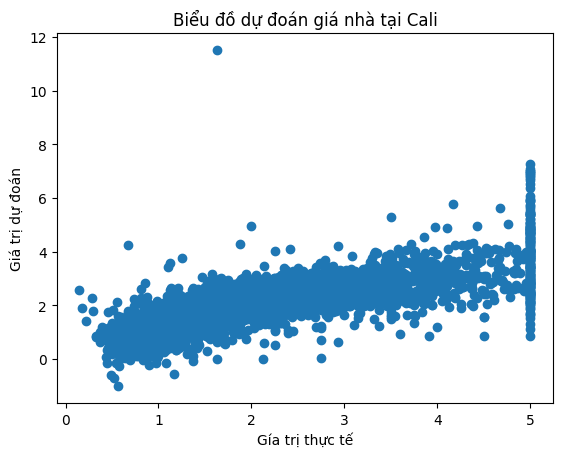

In [7]:
#SỬ DỤNG HỒI QUY TUYẾN TÍNH ĐỂ DỰ ĐOÁN GIÁ NHÀ THÔNG QUA BỘ DỮ LIỆU FETCH CALIFORNIA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
cali=fetch_california_housing()
X=pd.DataFrame(cali.data,columns=cali.feature_names)
y=pd.Series(cali.target)
#Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Xây dựng mô hình và huấn luyện
model=LinearRegression()
model.fit(X_train,y_train)

#Dự đoán và đánh giá
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#Vẽ biểu đồ
plt.scatter(y_test,y_pred)
plt.xlabel('Gía trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title("Biểu đồ dự đoán giá nhà tại Cali")
plt.show()

Confusion Matrix:
[[51  3]
 [ 2 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



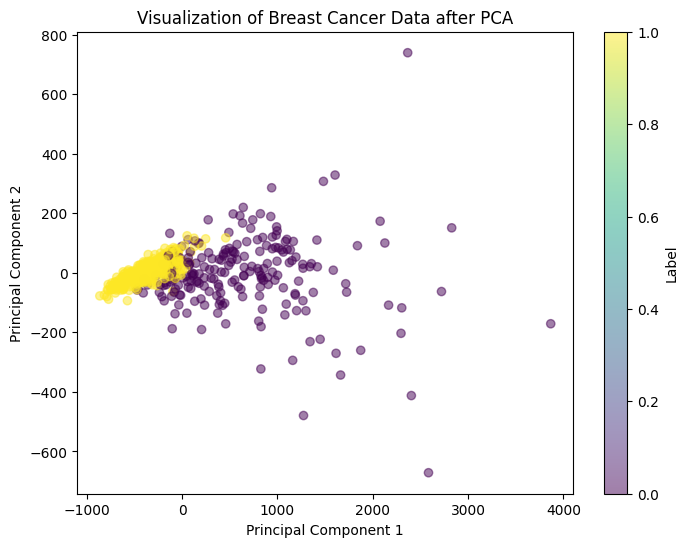

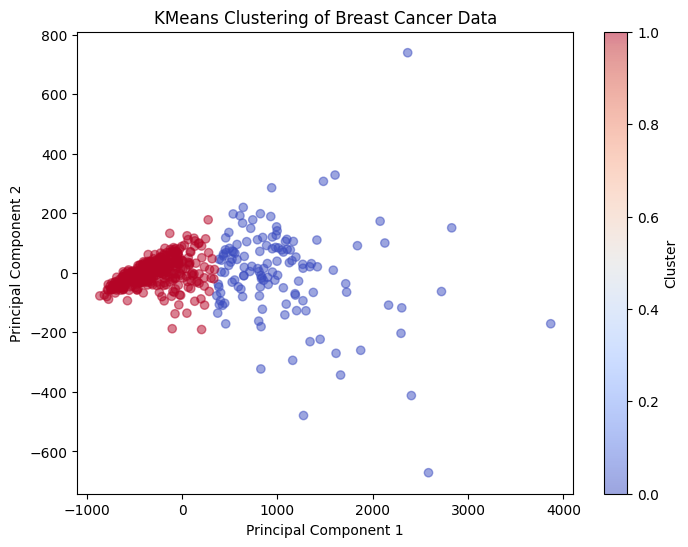

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Tải dữ liệu
data = load_breast_cancer()
X = data.data
y = data.target

# Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Xây dựng mô hình và huấn luyện
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Trực quan hóa dữ liệu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Breast Cancer Data after PCA')
plt.colorbar(label='Label')
plt.show()
# Phân cụm
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
# Nhóm các đối tượng có đặc điểm tương đồng mà không cần gắn nhãn
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Breast Cancer Data')
plt.colorbar(label='Cluster')
plt.show()

